In [1]:
from platform import python_version

#ML packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

#statistics
import statsmodels.api as sm

#SVM packages
from sklearn.svm import SVR

#Random Forest Regressor packages
from sklearn.ensemble import RandomForestRegressor

#Graphics packages

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

#Scientific computing and tables
import numpy as np
import pandas as pd
#Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.inspection import permutation_importance


%matplotlib inline
print(python_version())

3.8.8


In [2]:
pwd

'/Users/jmpessoa'

In [3]:
dados = pd.read_csv('data_water_absorption.csv')

In [4]:
#Exploratory Analysis
dados

,Cement,Sand,Water,√t/√s,Bacteria,Fiber,Water absorption
0,600,1200,270,0.00000,0,0,0.00000
1,600,1200,270,1.54000,0,0,0.05812
2,600,1200,270,3.08000,0,0,0.11624
3,600,1200,270,4.62000,0,0,0.17437
4,600,1200,270,6.16000,0,0,0.23249
...,...,...,...,...,...,...,...
727,600,1200,170,159.14600,2,3,0.89000
728,600,1200,170,171.32201,2,3,0.94250
729,600,1200,170,183.49800,2,3,0.99500
730,600,1200,170,195.67401,2,3,1.04750


In [5]:
print(dados.dtypes)

Cement                int64
Sand                  int64
Water                 int64
√t/√s               float64
Bacteria              int64
Fiber                 int64
Water absorption    float64
dtype: object


<AxesSubplot:>

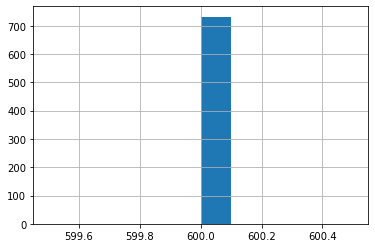

In [6]:
dados["Cement"].hist()

<AxesSubplot:>

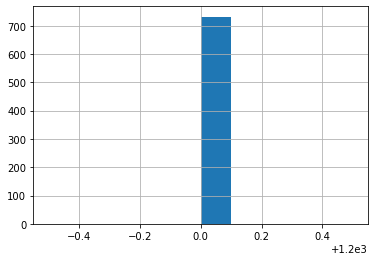

In [7]:
dados["Sand"].hist()

<AxesSubplot:>

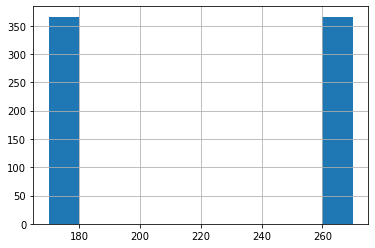

In [8]:
dados["Water"].hist()

<AxesSubplot:>

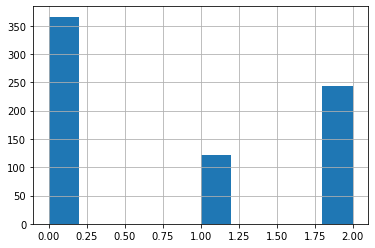

In [9]:
dados["Bacteria"].hist()

<AxesSubplot:>

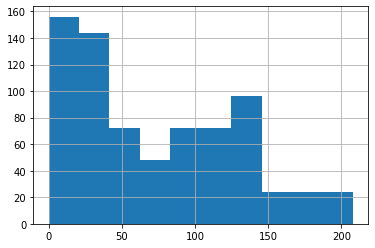

In [11]:
dados["√t/√s"].hist()

<AxesSubplot:>

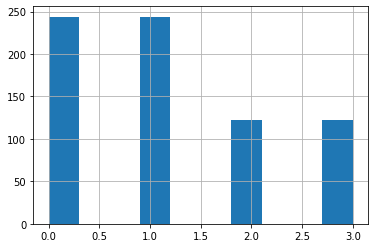

In [12]:
dados["Fiber"].hist()

<AxesSubplot:>

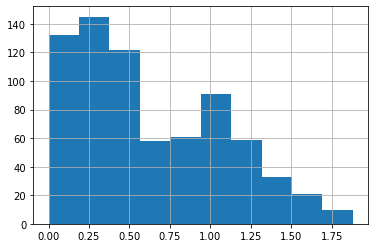

In [13]:
dados["Water absorption"].hist()

In [14]:
#Preparing the data for ML
y = dados['Water absorption'].values #values to train
x = dados.drop('Water absorption', axis=1) #descriptors
print(y) 
print("Há {} Descritores possíveis:\n\n{}".format(x.shape[1], x.columns.values))

[0.      0.05812 0.11624 0.17437 0.23249 0.29061 0.33431 0.37801 0.42171
 0.46541 0.50911 0.53042 0.55173 0.57304 0.59435 0.61566 0.63716 0.65866
 0.68015 0.70165 0.72315 0.74561 0.76808 0.79054 0.81301 0.83547 0.85414
 0.8728  0.89147 0.91013 0.9288  0.95299 0.97718 1.00138 1.02557 1.04976
 1.05936 1.06896 1.07855 1.08815 1.09775 1.11351 1.12928 1.14504 1.16081
 1.17657 1.1928  1.20903 1.22527 1.2415  1.25773 1.27736 1.29699 1.31663
 1.33626 1.35589 1.44646 1.53703 1.62759 1.71816 1.80873 0.      0.02874
 0.05748 0.08622 0.11496 0.1437  0.16772 0.19175 0.21577 0.2398  0.26382
 0.27643 0.28904 0.30164 0.31425 0.32686 0.34481 0.36276 0.3807  0.39865
 0.4166  0.43726 0.45792 0.47857 0.49923 0.51989 0.54779 0.57569 0.6036
 0.6315  0.6594  0.69571 0.73202 0.76832 0.80463 0.84094 0.86099 0.88104
 0.9011  0.92115 0.9412  0.94812 0.95504 0.96196 0.96888 0.9758  0.98144
 0.98708 0.99272 0.99836 1.004   1.01106 1.01813 1.02519 1.03226 1.03932
 1.0569  1.07448 1.09205 1.10963 1.12721 0.      0.0

In [15]:
#Correlation between variables
#Creating a Correlation Plot

def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

In [16]:
matriz_corr = x.corr()
print (matriz_corr)

          Cement  Sand         Water         √t/√s      Bacteria         Fiber
Cement       NaN   NaN           NaN           NaN           NaN           NaN
Sand         NaN   NaN           NaN           NaN           NaN           NaN
Water        NaN   NaN  1.000000e+00  8.064259e-17 -9.284767e-01  5.093619e-17
√t/√s        NaN   NaN  8.064259e-17  1.000000e+00 -7.601236e-17 -9.132575e-18
Bacteria     NaN   NaN -9.284767e-01 -7.601236e-17  1.000000e+00  1.160030e-01
Fiber        NaN   NaN  5.093619e-17 -9.132575e-18  1.160030e-01  1.000000e+00


In [17]:
#Correlation showed that cement and sand do not matter

In [18]:
dados = dados.drop(["Cement", "Sand", "Water"], axis = 1)

In [19]:
dados.head()

,√t/√s,Bacteria,Fiber,Water absorption
0,0.00,0,0,0.00000
1,1.54,0,0,0.05812
2,3.08,0,0,0.11624
3,4.62,0,0,0.17437
4,6.16,0,0,0.23249


In [20]:
X = dados.drop('Water absorption', axis=1) #descriptors
RX = X.copy()
RX.head()

,√t/√s,Bacteria,Fiber
0,0.00,0,0
1,1.54,0,0
2,3.08,0,0
3,4.62,0,0
4,6.16,0,0


In [21]:
RX = sm.add_constant(RX)

/Users/jmpessoa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
RX.head()

,const,√t/√s,Bacteria,Fiber
0,1.0,0.00,0,0
1,1.0,1.54,0,0
2,1.0,3.08,0,0
3,1.0,4.62,0,0
4,1.0,6.16,0,0


In [23]:
#Scale the data
stdScaler = StandardScaler()
 

# Transform z = (x - u) /s
X1 = stdScaler.fit_transform(X) 
print(X1)

[[-1.32441269 -0.92847669 -1.09321633]
 [-1.29680135 -0.92847669 -1.09321633]
 [-1.26919001 -0.92847669 -1.09321633]
 ...
 [ 1.96560424  1.29986737  1.71791138]
 [ 2.18391332  1.29986737  1.71791138]
 [ 2.40222204  1.29986737  1.71791138]]


In [25]:
colunas = ["√t/√s","Bacteria","Fiber"]
X = pd.DataFrame(X1, columns = colunas)

In [26]:
X.head()

,√t/√s,Bacteria,Fiber
0,-1.324413,-0.928477,-1.093216
1,-1.296801,-0.928477,-1.093216
2,-1.269190,-0.928477,-1.093216
3,-1.241579,-0.928477,-1.093216
4,-1.213967,-0.928477,-1.093216


In [27]:
matriz_corr = X.corr()
print (matriz_corr)

                 √t/√s      Bacteria         Fiber
√t/√s     1.000000e+00 -5.156774e-17 -2.548053e-17
Bacteria -5.156774e-17  1.000000e+00  1.160030e-01
Fiber    -2.548053e-17  1.160030e-01  1.000000e+00


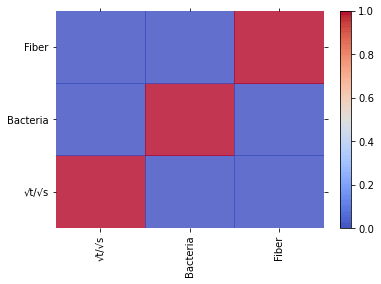

In [28]:
#Generating number of observations and variables
observations = len(dados)
variables = dados.columns[:-1]
visualize_correlation_matrix(X, hurdle = 0.5)

In [29]:
X.head()

,√t/√s,Bacteria,Fiber
0,-1.324413,-0.928477,-1.093216
1,-1.296801,-0.928477,-1.093216
2,-1.269190,-0.928477,-1.093216
3,-1.241579,-0.928477,-1.093216
4,-1.213967,-0.928477,-1.093216


In [30]:
#Multiple Linear Regression
#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
rX_train, rX_test, ry_train, ry_test = train_test_split(RX, y, test_size=0.2, random_state = 42)

In [31]:
ols = sm.OLS(ry_train, rX_train)

In [32]:
results = ols.fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     322.1
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          4.00e-123
Time:                        10:31:35   Log-Likelihood:                -83.183
No. Observations:                 585   AIC:                             174.4
Df Residuals:                     581   BIC:                             191.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4641      0.025     18.558      0.0

In [34]:
#Create the model
modelo = LinearRegression()

In [35]:
#Train the model
modelo_v2 = modelo.fit(rX_train, ry_train)

In [36]:
pred2 = modelo_v2.predict(rX_test)

In [37]:
#Calculate the R2 metric of the model
r2_score(ry_test, modelo_v2.fit(rX_train, ry_train).predict(rX_test))

0.5476631459594916

In [38]:
#FUNCTION TO SHOW R2 ON THE GRAPH
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Water absorption'], data['Predicted'])
    r = float(r) ** 2
    err = mean_squared_error(data['Water absorption'], data['Predicted'], squared=True)
    ax = plt.gca()
    #ax.setxlabel("Area")
    ax.text(.05, .8, 'r2={:.3f}, p={:.6f}, RMSE={:.4f}'.format(r, p, err),
            transform=ax.transAxes)

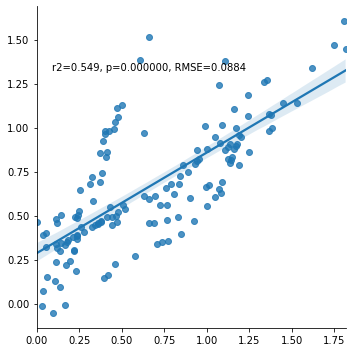

In [39]:
#Visualization Multiple Linear Regression
#Plot
df = pd.DataFrame()
df['Water absorption'] = y_test
df['Predicted'] = pred2

g = sns.lmplot(x = 'Water absorption', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

In [40]:
# The coefficients
print("Coefficients: \n", modelo_v2.coef_)
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, pred2))

Coefficients: 
 [ 0.          0.00548979 -0.16099757 -0.09034921]
Mean squared error: 0.088


In [41]:
modelo_v2.intercept_

0.46413359312983815

In [42]:
def printFormulaMLR(coefs, intercept):
    formula = "y = "
    for val in coefs:
        if val < 0:
            formula = formula + " - " + str(abs(val))
        else:
            formula = formula + " + " +str(abs(val))  
    
    formula = formula + " + " + str(intercept)    
    return formula

In [43]:
print(printFormulaMLR(modelo_v2.coef_, modelo_v2.intercept_))

y =  + 0.0 + 0.005489794622023661 - 0.16099757468943104 - 0.09034921117479369 + 0.46413359312983815


In [44]:
#SVM with kernel polynomial
#SVM polinomial
#SVM sigmoid
svr_rbf = SVR(kernel="rbf", C=1, gamma=0.1, epsilon=0.1, max_iter = 10000)
svr_poly = SVR(kernel="poly", C=0.5, gamma=0.1, coef0 = 0.15, max_iter = 10000)
svr_sig = SVR(kernel="sigmoid", C=0.5, gamma=0.01, coef0 = 0.05, max_iter = 100000)

In [45]:
svr_rbf.fit(X_train,y_train)

SVR(C=1, gamma=0.1, max_iter=10000)

In [46]:
svr_poly.fit(X_train, y_train)

SVR(C=0.5, coef0=0.15, gamma=0.1, kernel='poly', max_iter=10000)

In [47]:
svr_sig.fit(X_train, y_train)

SVR(C=0.5, coef0=0.05, gamma=0.01, kernel='sigmoid', max_iter=100000)

In [48]:
y_pred = pd.DataFrame()
y_pred["RBF"] = svr_rbf.predict(X_test)

In [49]:
y_pred["POLY"] = svr_poly.predict(X_test)

In [50]:
y_pred["SIG"] = svr_sig.predict(X_test)

In [51]:
y_pred.head()

,RBF,POLY,SIG
0,0.521059,0.513567,0.924708
1,1.082709,0.997939,0.867578
2,1.509320,1.525329,1.353914
3,0.635084,0.563390,0.631961
4,0.137655,0.267139,0.233229


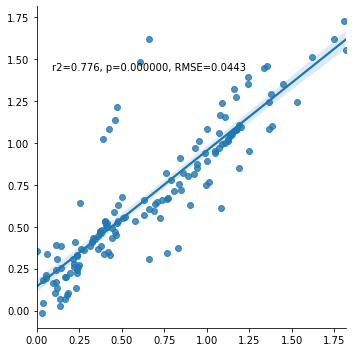

In [52]:
#RBF Visualization
#Plot
df = pd.DataFrame()
df['Water absorption'] = y_test
df['Predicted'] = y_pred["RBF"].values

g = sns.lmplot(x = 'Water absorption', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

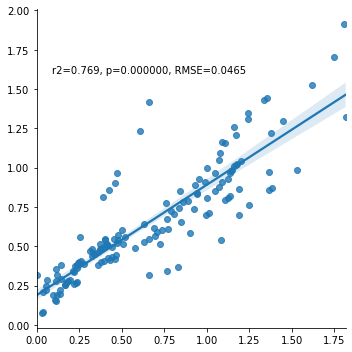

In [53]:
#Polynomial Visualization
#Plot
df = pd.DataFrame()
df['Water absorption'] = y_test
df['Predicted'] = y_pred["POLY"].values

g = sns.lmplot(x = 'Water absorption', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

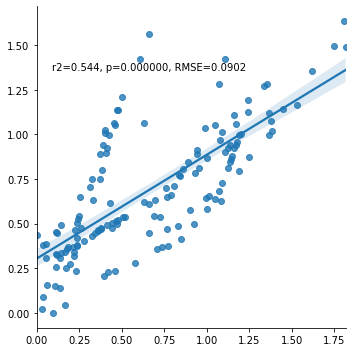

In [54]:
#Sigmoid Visualization
#Plot
df = pd.DataFrame()
df['Water absorption'] = y_test
df['Predicted'] = y_pred["SIG"].values

g = sns.lmplot(x = 'Water absorption', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

In [55]:
#metricas
print("R2 Treino RBF: ", r2_score(y_train, svr_rbf.fit(X_train, y_train).predict(X_train)))
print("R2 Treino Polynomial: ", r2_score(y_train, svr_poly.fit(X_train, y_train).predict(X_train)))
print("R2 Treino Sigmoid: ", r2_score(y_train, svr_sig.fit(X_train, y_train).predict(X_train)))
print("R2 Teste RBF: ", r2_score(y_test, svr_rbf.fit(X_train, y_train).predict(X_test)))
print("R2 Teste Polynomial: ", r2_score(y_test, svr_poly.fit(X_train, y_train).predict(X_test)))
print("R2 Teste Sigmoid: ", r2_score(y_test, svr_sig.fit(X_train, y_train).predict(X_test)))
print("RMSE Treino RBF: ", mean_squared_error(y_train, svr_rbf.fit(X_train, y_train).predict(X_train)))
print("RMSE Treino Polynomial: ", mean_squared_error(y_train, svr_poly.fit(X_train, y_train).predict(X_train)))
print("RMSE Treino Sigmoid: ", mean_squared_error(y_train, svr_sig.fit(X_train, y_train).predict(X_train)))
print("RMSE Teste RBF: ", mean_squared_error(y_test, svr_rbf.fit(X_train, y_train).predict(X_test)))
print("RMSE Teste Polynomial: ", mean_squared_error(y_test, svr_poly.fit(X_train, y_train).predict(X_test)))
print("RMSE Teste Sigmoid: ", mean_squared_error(y_test, svr_sig.fit(X_train, y_train).predict(X_test)))
print("MAE Treino RBF: ", mean_squared_error(y_train, svr_rbf.fit(X_train, y_train).predict(X_train)))
print("MAE Treino Polynomial: ", mean_absolute_error(y_train, svr_poly.fit(X_train, y_train).predict(X_train)))
print("MAE Treino Sigmoid: ", mean_absolute_error(y_train, svr_sig.fit(X_train, y_train).predict(X_train)))
print("MAE Teste RBF: ", mean_absolute_error(y_test, svr_rbf.fit(X_train, y_train).predict(X_test)))
print("MAE Teste Polynomial: ", mean_absolute_error(y_test, svr_poly.fit(X_train, y_train).predict(X_test)))
print("MAE Teste Sigmoid: ", mean_absolute_error(y_test, svr_sig.fit(X_train, y_train).predict(X_test)))

R2 Treino RBF:  0.7961853170026165
R2 Treino Polynomial:  0.7793959291130815
R2 Treino Sigmoid:  0.6164030326349856
R2 Teste RBF:  0.7734647030297215
R2 Teste Polynomial:  0.762251809278583
R2 Teste Sigmoid:  0.5383638894430971
RMSE Treino RBF:  0.04223546090955103
RMSE Treino Polynomial:  0.04571463878562606
RMSE Treino Sigmoid:  0.07949081234925244
RMSE Teste RBF:  0.04428337584121057
RMSE Teste Polynomial:  0.046475284982479485
RMSE Teste Sigmoid:  0.0902411485497912
MAE Treino RBF:  0.04223546090955103
MAE Treino Polynomial:  0.15567033566503222
MAE Treino Sigmoid:  0.22384045444760595
MAE Teste RBF:  0.13925115610311656
MAE Teste Polynomial:  0.1611536290591419
MAE Teste Sigmoid:  0.24176950911417389


In [69]:
# Create a scatter plot
fig = px.scatter(df, x=df['Water absorption'], y=y_pred["RBF"], 
                 opacity=0.8, color_discrete_sequence=['red'])

# Add a best-fit line
#fig.add_scatter(x=df['Water absorption'], y=y_pred["RBF"], name='RBF', opacity=0.8)
#fig.add_scatter
#fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
#fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='red', dash='dot')))
#fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Prediction of SVM Test Set", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [57]:
#Random Forest Regressor Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [58]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
pred3 = regressor.predict(X_test)

In [60]:
pred3.shape

(147,)

In [61]:
#Calculate the R2 metric of the model
print("R2 Treino: ", r2_score(y_train, regressor.fit(X_train, y_train).predict(X_train)))
print("R2 Teste: ", r2_score(y_test, regressor.fit(X_train, y_train).predict(X_test)))
print("RMSE Treino: ", mean_squared_error(y_train, regressor.fit(X_train, y_train).predict(X_train)))
print("RMSE Teste: ", mean_squared_error(y_test, regressor.fit(X_train, y_train).predict(X_test)))
print("MAE Treino: ", mean_squared_error(y_train, regressor.fit(X_train, y_train).predict(X_train)))
print("MAE Teste: ", mean_absolute_error(y_test, regressor.fit(X_train, y_train).predict(X_test)))

R2 Treino:  0.8666129697822035
R2 Teste:  0.6636651892086074
RMSE Treino:  0.027641103269665648
RMSE Teste:  0.06574710887862999
MAE Treino:  0.027641103269665648
MAE Teste:  0.12452662473032075


[0.61399343 0.18113737 0.2048692 ]


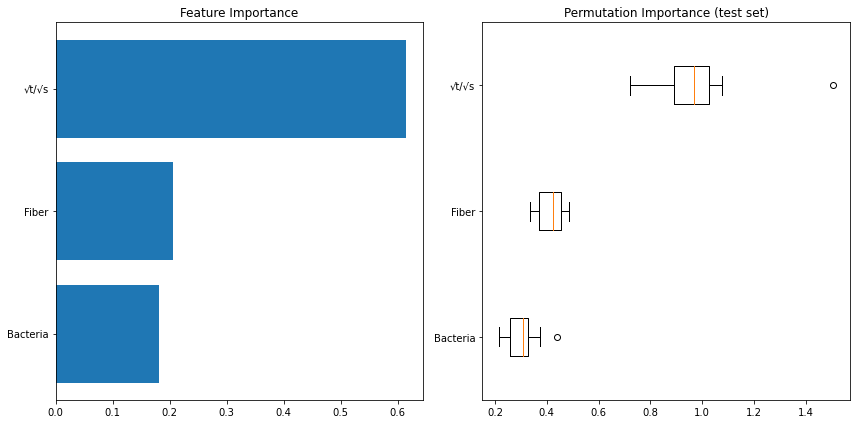

In [62]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [63]:
train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train)

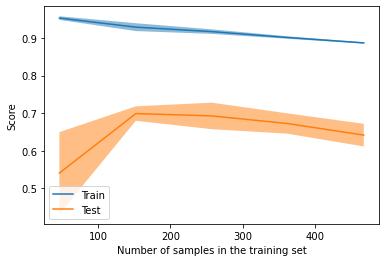

In [64]:
display = LearningCurveDisplay(train_sizes=train_sizes,train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

In [66]:
#FUNCTION TO SHOW R2 ON THE GRAPH
def annotate_Water_absorption(data, **kws):
    r, p = sp.stats.pearsonr(data['Water absorption'], data['Predicted'])
    r = float(r) ** 2
    err = mean_squared_error(data['Water absorption'], data['Predicted'], squared=True)
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.6f}, RMSE={:.4f}'.format(r, p, err),
            transform=ax.transAxes)

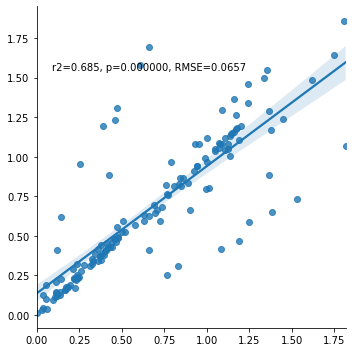

In [67]:
#Random Forest Regressor Visualization
#Plot
df = pd.DataFrame()
df['Water absorption'] = y_test
df['Predicted'] = pred3

g = sns.lmplot(x = 'Water absorption', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

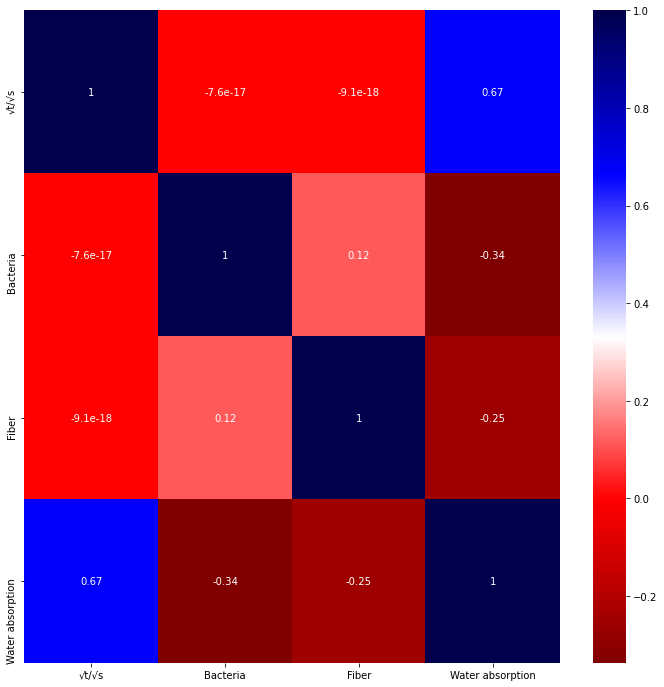

In [68]:
plt.figure(figsize=(12, 12))
sns.heatmap(dados.corr(), annot=dados.corr(), cmap='seismic_r')
plt.show()